## Optimal Control

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Set up the parameters

In [2]:
# parameters
S0 = 100
Q = 10 ** 6 #Initial number of stocks
T = 1; 
k = 1.5e-4; 
N = 1000;    #Number of trading times
phi = 100 * k; 
sigma = 0.30;

### Stock price simulation and plot

In [3]:
S = np.zeros((N + 1, 1))
tt = np.linspace(0, 1, N + 1)
S[0] = S0 
rn = np.random.standard_normal(S.shape) 
for t in range(1, N + 1): 
    S[t] = S[t-1] + sigma * np.sqrt(T/N) * rn[t]

Text(0.5, 1.0, 'Stock Price')

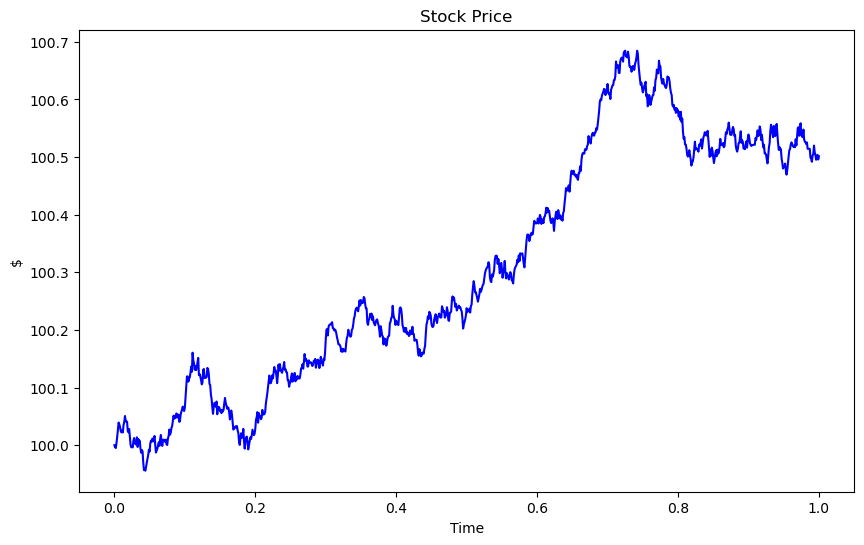

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S, 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Stock Price')

### Trading speed under different phis

In [5]:
phi = 1000 * k; 
phii = 10 * k;

In [6]:
v = np.zeros((N + 1, 1))
q = np.zeros((N + 1, 1))
v[0] = 0
q[0] = Q  
for t in range(1, N + 1): 
    v[t] = q[t-1] / ((T - tt[t-1] - k/phi) * N)
    q[t] = np.maximum(q[t-1] - v[t], 0)

In [7]:
vv = np.zeros((N + 1, 1))
qq = np.zeros((N + 1, 1))
vv[0] = 0
qq[0] = Q
for t in range(1, N + 1): 
    vv[t] = qq[t-1] / ((T - tt[t-1] - k/phii) * N)
    qq[t] = np.maximum(qq[t-1] - vv[t], 0)

Text(0.5, 1.0, 'Trading Speed')

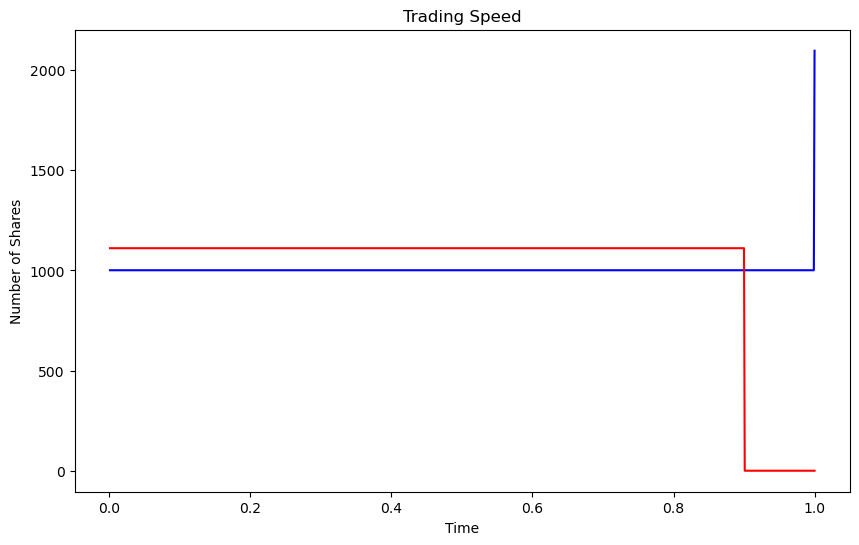

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], v[1:], 'b', lw=1.5)
plt.plot(tt[1:], vv[1:], 'r', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Number of Shares')
plt.title('Trading Speed')

Text(0.5, 1.0, 'Inventory')

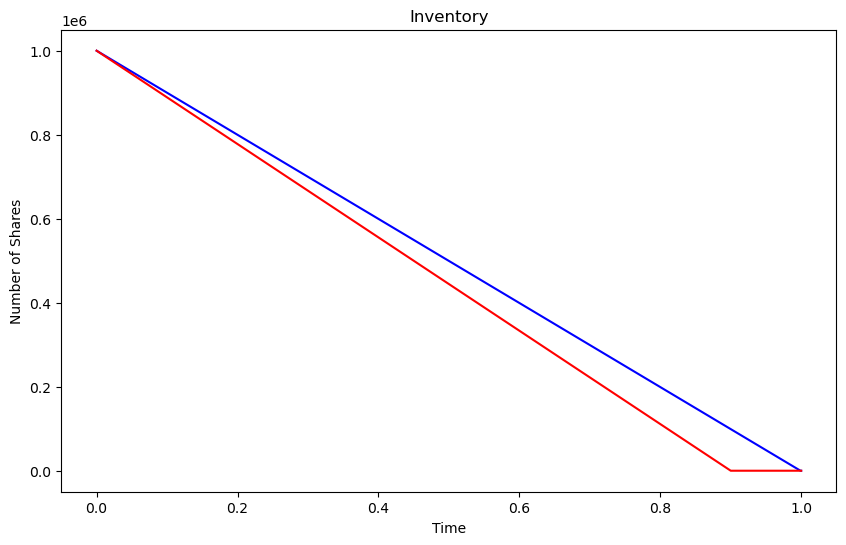

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(tt, q, 'b', lw=1.5)
plt.plot(tt, qq, 'r', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Number of Shares')
plt.title('Inventory')

### Revenue comparison

In [10]:
R = np.zeros((N + 1, 1))
R[0] = 0
for t in range(1, N + 1): 
    R[t] = R[t-1] +  S[t] * v[t]

In [11]:
RR = np.zeros((N + 1, 1))
RR[0] = 0
for t in range(1, N + 1): 
    RR[t] = RR[t-1] +  S[t] * vv[t]

Text(0.5, 1.0, 'Revenue')

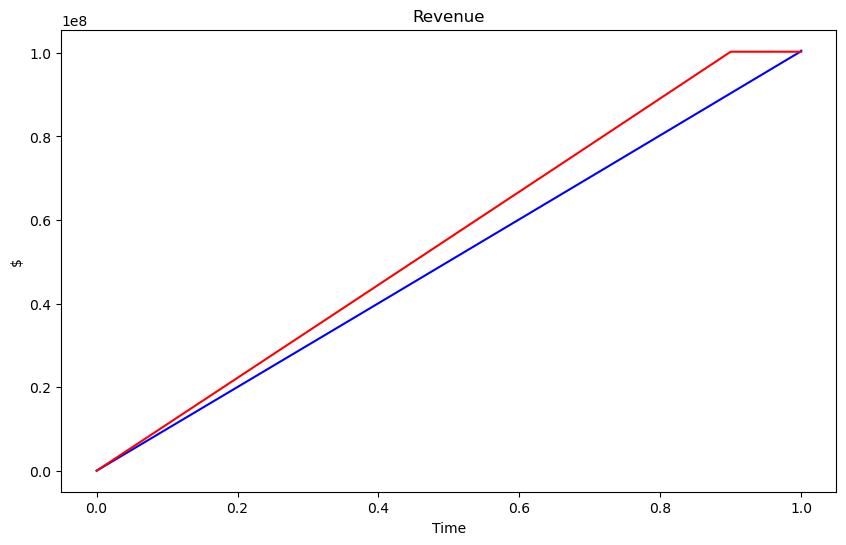

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(tt, R, 'b', lw=1.5)
plt.plot(tt, RR, 'r', lw=1.5)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Revenue')